In [1]:
%%capture
# Setup: Installing packages we will need in this notebook
%pip install pyfmreader
%pip install matplotlib

In [2]:
# 1. Import pyafmreader loadfile and matplotlib
from pyfmreader import loadfile
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
# Get documentation about loadfile function
help(loadfile)

Help on function loadfile in module pyfmreader.pyfmreader:

loadfile(filepath)
    Load AFM file. 
    
    Supported formats:
        - JPK --> .jpk-force, .jpk-force-map, .jpk-qi-data
        - JPK Thermal --> .tnd
        - NANOSCOPE --> .spm, .pfc, .00X
        - UFF --> .uff
    
            Parameters:
                    filepath (str): Path to the file.
            
            Returns:
                    If JPK, NANOSCOPE OR UFF:
                        UFF (uff.UFF): Universal File Format object containing loaded data.
                    If JPK Thermal:
                        Amplitude (m^2/V) (np.array),
                        Frequencies (Hz) (np.array),
                        Fit-Data (m^2/V) (np.array),
                        Parameters (dict)



In [3]:
JPK_FORCEMAP_PATH = r'../tests/testfiles/qi-data-2018.11.22-17.54.05.153.jpk-qi-data'

In [4]:
UFF = loadfile(JPK_FORCEMAP_PATH)

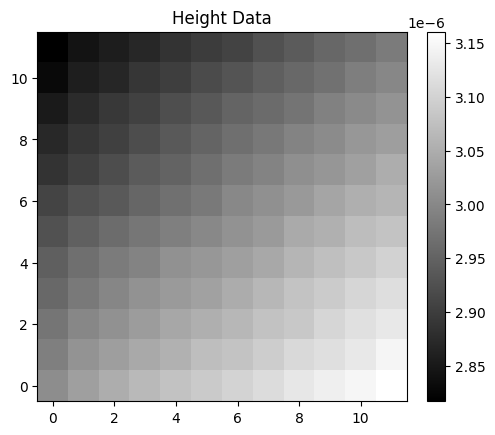

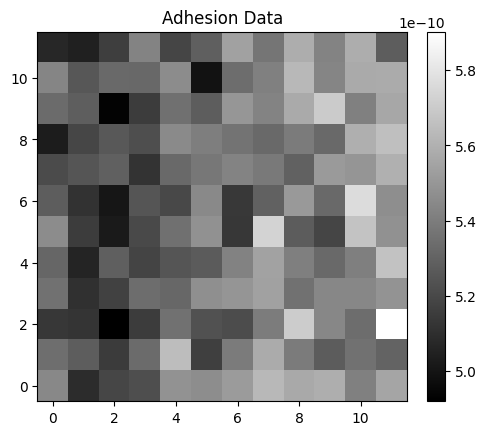

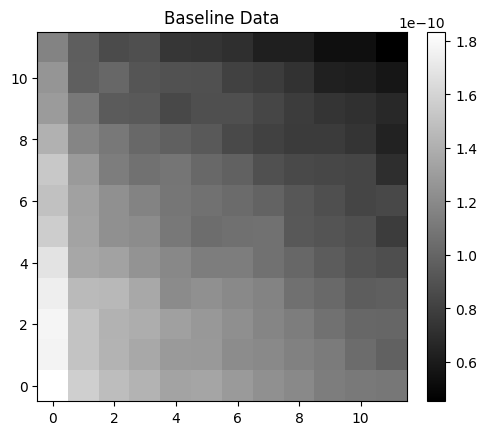

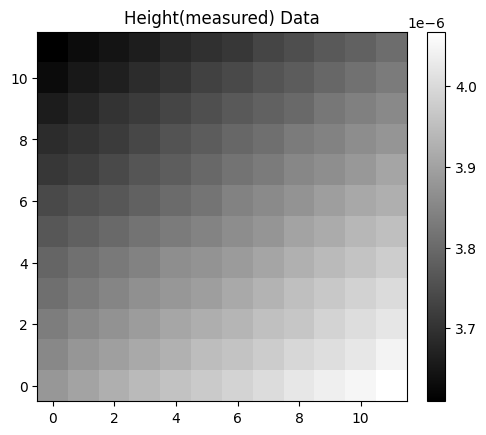

In [5]:
for channel, img in UFF.imagedata.items():
    im_ratio = img.shape[0] / img.shape[1]
    fig, axs = plt.subplots()
    channel_data = axs.imshow(img, cmap="gray", origin='lower')
    fig.colorbar(channel_data, ax=axs, fraction=0.046*im_ratio, pad=0.04)
    axs.set_title(f"{channel} Data")
    plt.show()